## Previsão de Sobrevivência do Titanic

Vamos analisar o conjunto de dado que contém informações e dados demográficos de 891 dentre os 2.224 passageiros e tripulação a bordo do Titanic e tentar descobrir o motivo de alguns grupos de pessoas serem mais propensas a sobreviver do que outras. Para fazer isso, iremos seguir os seguintes passos:

* Análise e exploração dos dados
* Brainstorm
* Wrangle(Limpar, preparar e arrumar os dados)
* Visualizar, reportar e demonstrar nossas descobertas

## 1. Importando bibliotecas essencias

+ Pandas: Utilizada para transformar os dados contidos no csv em um dataframe de fácil manipulação
+ Numpy : Utilizada para facilitar nosso esforço na análise dos dados
+ Seaborn e Matplotlib : Utilizada para construir, customizar e mostrar os gráficos da análise feita

In [391]:
#Importing the pandas library, responsable to manipulate and tranform the data contained on csv files on dataframes
import pandas as pd
#Importing the numpy library, responsible to smooth our effort in analyze the data
import numpy as np
#Importing the matplotlib and seaborn libraries, responsable to show the graphs about the findings
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Carregando os dados e verificando o seu conteúdo

Pandas é muito útil para carregar e trabalhar com os dados contidos no arquivo csv. Aqui estamos carregando os dados contidos em um csv para uma estrutura do Panda chamada dataframe do Panda de fácil manipulação e também carregando uma parte dos dados para verificar seu conteúdo.


In [392]:
passengers  = pd.read_csv('titanic-data-6.csv')
passengers.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Verificando algumas estatísticas

* Total de passageiros é de 891 no total
* A taxa de sobrevivência foi em torno de 38%
* Por volta de 75% dos passageiros viajaram sozinhos
* A média de idade é perto de 30 anos
* A média da tarifa paga foi em torno de 32

In [393]:
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Formulando a pergunta

Após conhecer e entender a estrutura dos nossos dados, assim como os seus valores, a dúvida que mais se acentua é : 

*Quais features(colunas) tem uma correlação com o fator sobrevivência?*

Como em todo o desastre, preferências de sobrevivência são dadas moralmente para mulheres, crianças, idosos e familias, porém também sabemos que pessoas de alto poder aquisitivo podem ter sido beneficiadas. 

Então vamos analisar e descobrir se os fatores como *Taxa(FareGroup)*,*Classe do Ticket(Pclass)*, *Genêro(Sex)*, *Família/Sozinho(FamilySize)* afetaram o fator sobrevivência também no desastre do Titanic. 

As perguntas seram as seguintes:

* O fator classe ou fator taxa da passagem tiveram relação com o fator sobrevivência? Pessoas com poder aquisitivo maior tinham propensão a sobreviver mais que pessoas com poder aquisitivo menor?
* O fator ser passageiro único ou viajar em família teve relação com o fator sobrevivência? Famílias tiveram mais chances de sobreviver do que pessoas viajando sozinha? E o tamanho da família interferia nessa correlação?
* O fator genêro teve relação com o fator sobrevivência? Mulheres tiveram mais propensão a sobreviver do que os homens?

## 5. Classificando as colunas do dataframe

######  **Dados categóricos**   
São dados que servem de label de um grupo de items ou indivíduos. Dados categóricos possuem a seguinte subdivisão:
* __Ordinal: __  São dados que não ordem ou algum tipo de ranking de classificação associado.
* __Nominal: __  São dados que possuem um ranking de classificação associado.
        
        
###### **Dados Quantitativos** 
São dados na qual podemos operar matematicamente em cima deles para obter insights úteis. Dados quantitativos possuem a seguinte subdivisão:
* __Discreto: __ São dados que podem ser subdivididos cada vez mais em menores unidades.
* __Contínuo: __ São dados que não podem ser subdividios em menores unidades.


Nossa classificação das colunas é a seguinte: 

######  **Dados categóricos**   
*  **Ordinal: ** Pclass
*  **Nominal: ** Survived, Sex, and Embarked

######  **Dados Quantitativos**   
*  **Discreto: ** SibSp, Parch
*  **Contínuo: ** Age, Fare



## 6. Verificando a qualidades dos dados

Realizaremos uma pré-análise para descobrir se existem colunas com dados faltantes, nulos ou vazio. 

Podemos verificar que as colunas Age, Cabin and Embarked possuem 177, 687 e 2 dados nulos respectivamentos. 


In [394]:
print(passengers.isnull().sum())
print(passengers.info())
print("Duplicated - {}".format(passengers.duplicated().sum()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
Duplicated - 0


## 7. Estratégia para as colunas com dados faltantes

### 7.1 Dados Quantitativos
Iremos complementar as colunas com dados faltantes utilizando a mediana pra cada Title e transformar o tipo da coluna pra inteiro, que é a representação adequada para a coluna. 
Os seguintes passos serão executados:
1. Criaremos uma coluna chamada Title para nos ajudar a calcular a idade referente ao título que a pessoa possui no nome
2. Calcularemos a mediana da idade pra cada título
3. Preencheremos os valores nulos com a mediana da idade referente ao título que a pessoa possui




In [395]:
passengers["Title"] = passengers.Name.str.extract('([A-Za-z]+)\.', expand=False)
ages                = passengers.groupby('Title')['Age'].median()
for title in passengers.Title.unique():
    median = ages[title]
    passengers.loc[(passengers.Age.isnull()) & (passengers.Title == title),"Age"] = median

passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## 7.2 Dados Qualitativos
Iremos completar as colunas com os dados faltantes utilizando a moda da distribuição. A coluna cabine possui vários valores nulos e como já temos a classe do ticket não irá nos atrapalhar na análise, então iremos dropar essa coluna.

In [396]:
passengers.Embarked.fillna(passengers['Embarked'].mode()[0],inplace=True)
passengers.drop("Cabin",axis="columns",inplace=True)
passengers.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

## 8. Criando novas colunas

Criaremos colunas novas afim de facilitar a análise dos dados

1. FamilySize - Irá representar a quantidade de pessoas de uma família na qual essa pessoa pertence. Se o valor for 1, indica que essa pessoa viajou sozinha.
2. AgeGroup   - Categorização das Idades. 
3. FareGroup  - Categorização das Tarifas em 4 faixas

In [397]:
passengers["FamilySize"]  = passengers.SibSp + passengers.Parch+ 1
passengers.Age            = passengers.Age.astype(int)
passengers["AgeGroup"]    = pd.cut(passengers.Age,range(0,90,15))
passengers["FareGroup"]   = pd.cut(passengers.Fare,4,labels=["Cheap","Normal","Expensive","Very Expensive"])
passengers["FamilyGroup"]    = pd.cut(passengers.FamilySize,[0,1,4,passengers.FamilySize.max()],labels=["Single","Normal","Large"])


## 9. Visualização Features x Sobrevivência

Primeiro construímos uma função que passado o nome da váriavel dependente e independente, ela gera um gráfico da relação entre as 2 variáveis


In [398]:
def bar(dependent,independent,data_frame):
    sns.countplot(x=independent, hue=dependent,data=data_frame)
    plt.ylabel("Number of people")
    plt.title("{} x {} x Number of people".format(independent,dependent).upper())
    plt.legend(["Not Survived","Survived"])
    plt.show()
   
def heatmap(data_frame):
    corr  = data_frame.corr()
    sns.heatmap(corr)
    plt.title("Heat Map".upper())
    plt.show()
    
def join(dependent,independent,data_frame):
    sns.jointplot(x=independent, y=dependent, data=data_frame,kind="reg");
    plt.ylabel(dependent)
    plt.title("{} x {}".format(independent,dependent).upper())
    plt.show()

def violin(dependent,independent,data_frame):
    sns.violinplot(x=independent, y=dependent,data=data_frame,split=True,size=4, aspect=.7)
    plt.ylabel(dependent)
    plt.title("{} x {}".format(independent,dependent).upper())
    plt.show()

def point(dependent,independent,data_frame):
    sns.pointplot(x=independent, y=dependent,data=data_frame, dodge=True)
    plt.ylabel(dependent)
    plt.title("{} x {}".format(independent,dependent).upper())
    plt.show()

def kde(dependent,independent,data_frame):
    facet = sns.FacetGrid(data_frame, hue=dependent,aspect=1.2,size=5)
    facet.map(sns.kdeplot,independent,shade= True)
    facet.set(xlim=(0, data_frame[independent].max()))
    plt.ylabel(dependent)
    plt.title("{} x {}".format(independent,dependent).upper())
    plt.legend(["Not Survived","Survived"])
    plt.show()
    
def swarm(x,y,hue,data_frame):
    sns.swarmplot(x=x, y=y, hue=hue, data=data_frame);
    plt.ylabel(y)
    plt.title("{} x {} x {}".format(x,y,hue).upper())
    plt.legend(["Not Survived","Survived"])
    plt.show()

def box(x,y,hue,data_frame):
    sns.boxplot(x=x, y=y, hue=hue, data=data_frame);
    plt.ylabel(y)
    plt.title("{} x {} x {}".format(x,y,hue).upper())
    plt.legend(["Not Survived","Survived"])
    plt.show()

    
def graph(graph):
    switcher = {
            "bar": bar,
            "heatmap": heatmap,
            "join": join,
            "violin": violin,
            "point": point,
            "kde": kde,
            "swarm": swarm,
            "box": box
        }
    # Get the function from switcher dictionary
    return switcher.get(graph)

bar     = graph("bar")
heatmap = graph("heatmap")
join    = graph("join")
violin  = graph("violin")
point   = graph("point")
kde     = graph("kde")
swarm   = graph("swarm")
box     = graph("box")

## 9.1 HeatMap

O gráfico de heatmap é importante para verificarmos o quão correlacionadas estão as variáveis uma das outras, assim teremos uma noção de quais são importantes para nossa análise e consequentemente estarão em nossas futuras vizualizações.

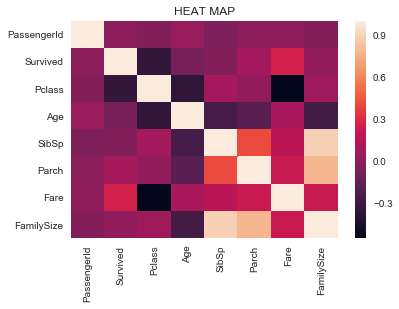

In [399]:
heatmap(passengers)

## 9.1 Gráficos Pclass x Survived

Nos gráficos vemos que a 1º classe foi a única com taxa de sobrevivência maior do que a de não sobrevivência comparada as outras classes(2º,3º) e que na 3º classe a discrepância entre mortos e sobreviventes foi bem alta comparada as outras classes(1º,2º), com muito mais mortos do que sobreviventes.

A tendência de sobrevivência é maior em pessoas da 1º mas no caso das outras classes(2º,3º) principalmente na 3º, a tendência é de não sobrevivência

In [400]:
#Setting aesthetics of seaborn  graphic and setting our dependent variable
sns.set()
dependent = "Survived"

In [401]:
independent = "Pclass"


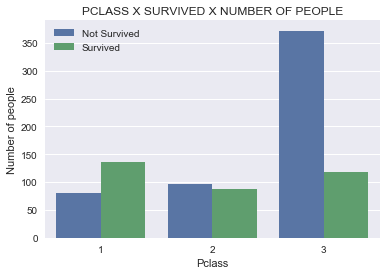

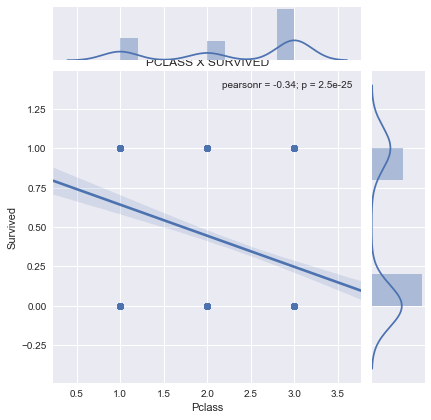

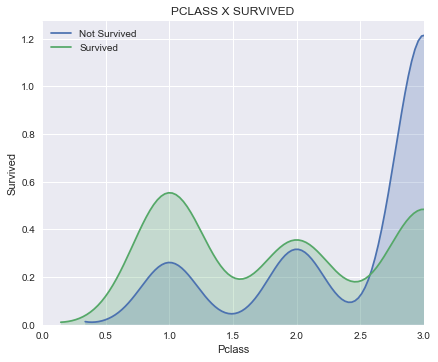

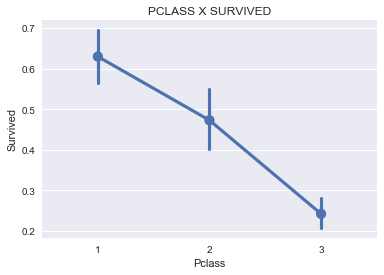

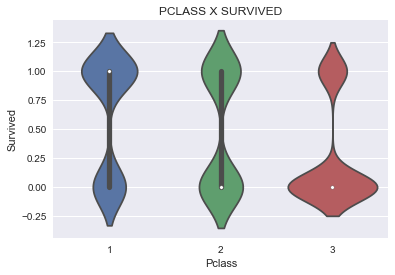

In [402]:
bar(dependent,independent,passengers)
join(dependent,independent,passengers)
kde(dependent,independent,passengers)
point(dependent,independent,passengers)
violin(dependent,independent,passengers)



## 9.2 Gráficos Sex x Survived

Nos gráficos vemos que a taxa de sobrevivência de mulheres foi maior do que a de não sobrevivência comparada a taxa dos homens.

A tendência de sobrevivência é maior nas mulheres do que nos homens.

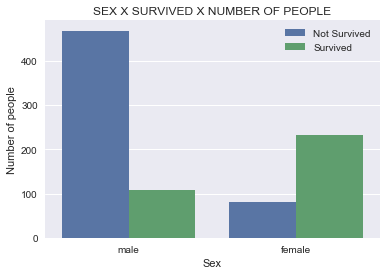

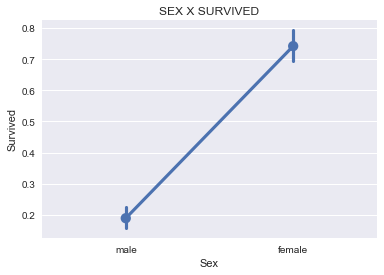

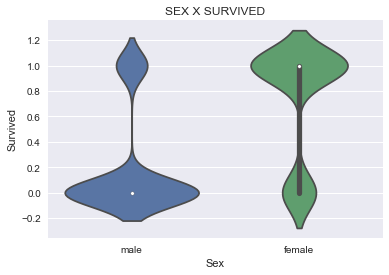

In [403]:
independent   = "Sex"
bar(dependent,independent,passengers)
point(dependent,independent,passengers)
violin(dependent,independent,passengers)


## 9.3 Gráficos FamilyGroup x Survived e FamilySize x Survived

Temos uma categorização da quantidade de familiares:
* Single          - (1)
* Normal          - (2 - 4)
* Large           - (5 - 11)

Nos gráficos vemos famílias de tamanho normal, de 2 até 4 integrantes foi a única com taxa de sobrevivência maior do que a de não sobrevivência comparada com as outras categorias.

A tendência de sobrevivência é maior em famílias de tamanho normal, do que em famílias grandes ou até mesmo se a pessoa estivesse viajando sozinha.


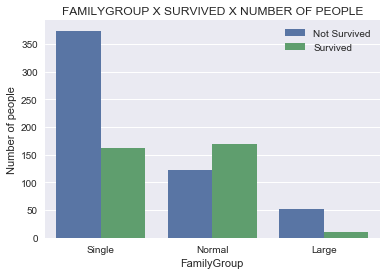

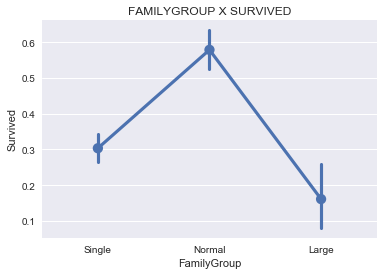

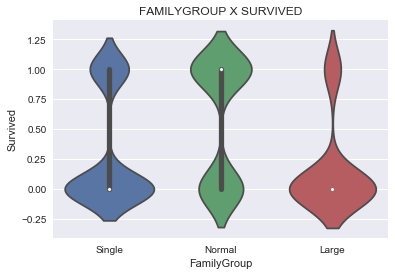

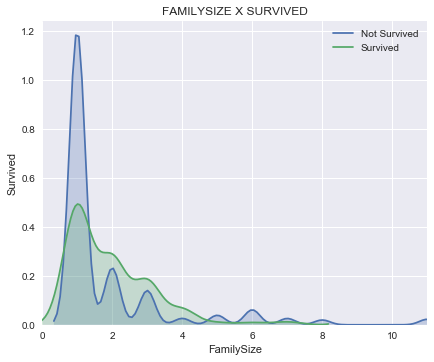

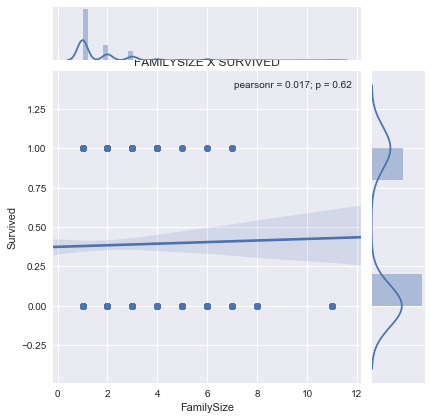

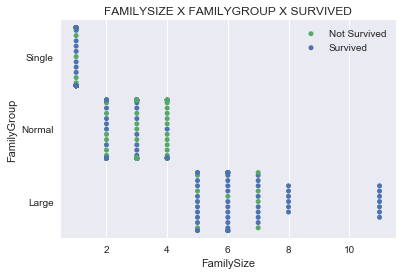

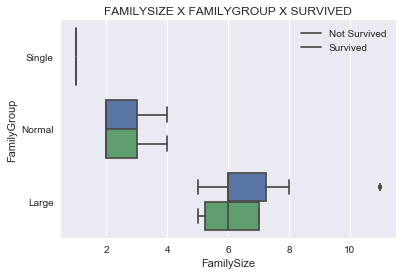

In [404]:
independent = "FamilyGroup"
bar(dependent,independent,passengers)
point(dependent,independent,passengers)
violin(dependent,independent,passengers)
independent = "FamilySize"
kde(dependent,independent,passengers)
join(dependent,independent,passengers)
swarm(independent,"FamilyGroup",dependent,passengers)
box(independent,"FamilyGroup",dependent,passengers)

## 9.4 Gráficos FareGroup x Survived e Fare x Survived

Temos uma categorização dos valores da Tarifa pagas:
* Cheap           - (0 - 128.082)
* Normal          - (128.083 - 256.165)
* Expensive       - (256.166 - 384.247)
* Very Expensive  - (384.248 - 512.329)

Nos gráficos vemos que a tarifa mais barata foi a única que teve a taxa de não sobrevivência maior do que de sobrevivência e com uma discrepância muito alta comparada com as outras tarifas. 

A tendência de sobrevivência é maior em pessoas que obtiveram taxas entre Normal e Carissimas(Normal - Very Expensive) comparadas as taxas mais baratas(Cheap).

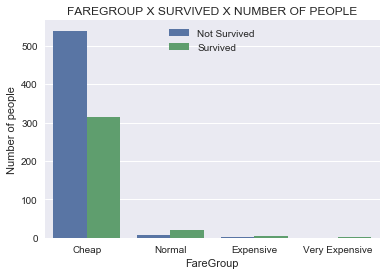

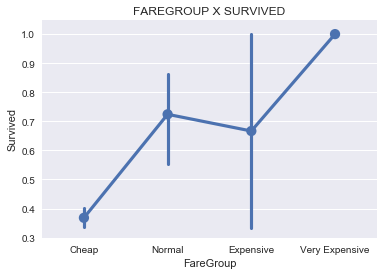

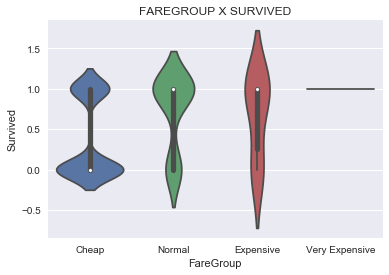

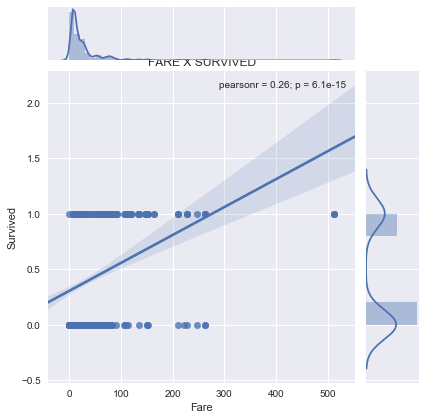

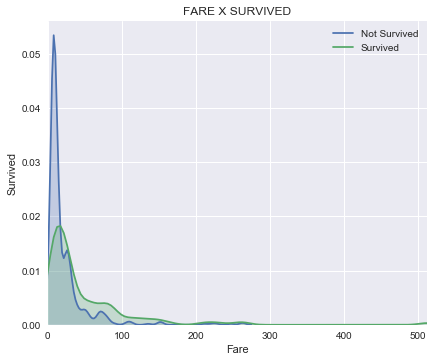

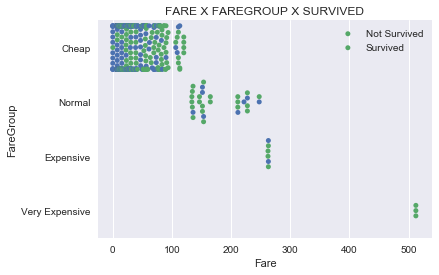

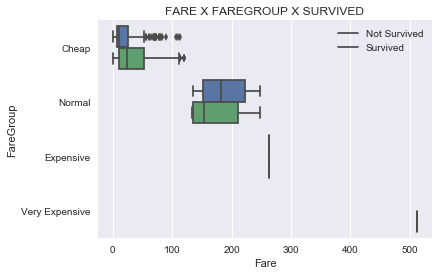

In [405]:
independent = "FareGroup"
bar(dependent,independent,passengers)
point(dependent,independent,passengers)
violin(dependent,independent,passengers)
independent = "Fare"
join(dependent,independent,passengers)
kde(dependent,independent,passengers)
swarm(independent,"FareGroup",dependent,passengers)
box(independent,"FareGroup",dependent,passengers)

## 9.4 Gráficos AgeGroup x Survived e Age x Survived

Nos gráficos vemos que a faixa etária de (0 - 15) foi a única que teve mais sobreviventes do que mortos e que na faixa de (15 - 30) a discrepância entre mortos e sobreviventes foi bem alta comparada as outras faixas, com muito mais mortos do que sobreviventes.

A tendência de sobrevivência é maior em pessoas de 0 até 15 anos mas no caso das outras faixas etárias principalmente de 15 até 30, a tendência é de não sobrevivência

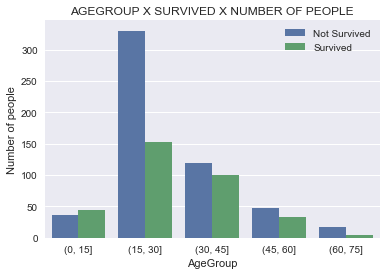

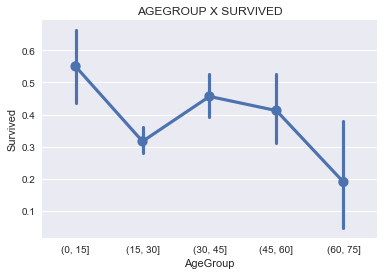

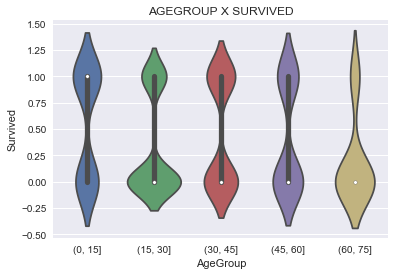

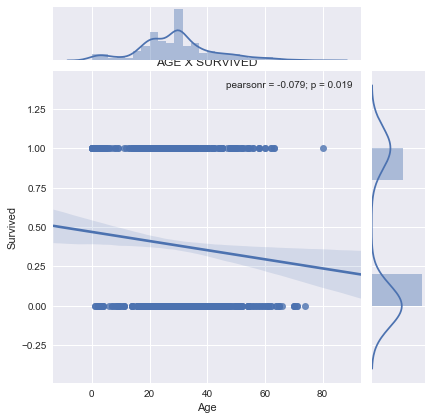

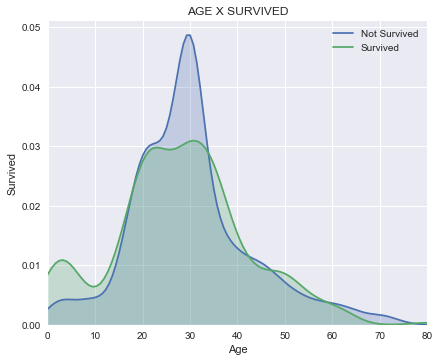

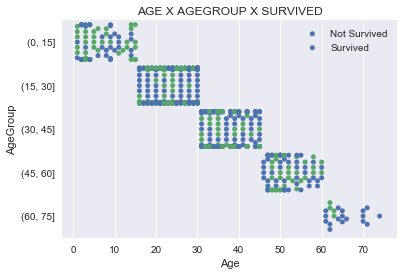

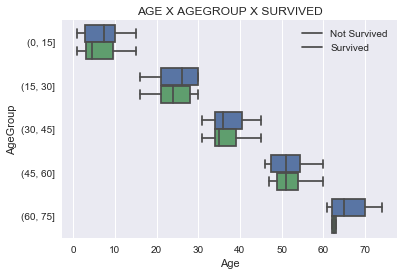

In [406]:
independent = "AgeGroup"
bar(dependent,independent,passengers)
point(dependent,independent,passengers)
violin(dependent,independent,passengers)
independent = "Age"
join(dependent,independent,passengers)
kde(dependent,independent,passengers)
swarm(independent,"AgeGroup",dependent,passengers)
box(independent,"AgeGroup",dependent,passengers)

## 10 - Conclusão 

Pontos chaves da análise:

* __Sexo dos passageiros__ : Existe uma forte correlação entre o sexo dos passageiros e os sobreviventes, aparentemente mulheres tiveram preferências de uso dos botes salvavidas em relação aos homens;

* __Classe da Passagem__: Assim como o sexo, a classe das passagens também possui uma forte correlação com o fator de sobrevivência, classes melhores possuem taxa de sobrevivência maior;

* __Idade__: Não possue uma correlação muito forte, porém no gráfico de distribuição populacional dos sobreviventes, verificamos um pico em torno do intervalo (<5 anos) que indica uma preferência de uso dos botes salvavidas também para as crianças;

* __Tarifa__: Não aparente ter uma correlação com o fator sobrevivência e nem possue algo a se destacar;

* __Tamanho das famílias__: Aparentemente famílias de tamanho normal(2 - 4 membros) apresentaram um fator de sobrevivência maior do que famílias maiores(> 4 membros) e passageiros que viajaram sozinhos.


## 10.1 - Limitações

Essa amostra de dados referente ao naufrágio do Titanic possuí algumas limitações e tivemos alguns desafios para efetuar essa análise. As colunas Cabin, Age e Embarked possuem dados faltantes. 

Por conta do alto número de dados faltantes da coluna Cabin, dropamos essa coluna pois a mesma acabaria alterando os resultados de nossa análise, a coluna Embarked possuí apenas 2 registros faltantes, sendo um valor tão baixo, calculamos a moda da coluna Embarked, que foi o valor "S" e adicionamos a esses 2 registros. A coluna Age porém foi um pouco mais complicado, além de uma quantidade alta de registros faltantes, essa coluna seria essencial pra nossa análise então tivemos que adotar uma estratégia mais complexa comparada as outras. Extraímos da coluna Name, o equivalente ao pronome de tratamento e categorizamos os passageiros conforme o valor extraído, após efetuada essa extração calculamos a média de idade pra cada pronome de tratamento e adicionamos essa média nos registros faltantes usando como comparação o pronome de tratamento do registro na qual o dado Age estava faltando. Assim conseguimos sanar os problemas quanto a amostra de dados.

No naufrágio do Titanic dos 2224 passageiros apenas 722 sobreviveram, uma taxa de sobrevivência de ± 30% do que seria a nossa população. Nossa amostra possue registros de 891 passageiros, o que representa 40% do total da população, porém possue uma taxa de sobrevivência de ± 38%, um valor muito próximo do valor da população. Com isso podemos dizer que essa amostra é uma representação bem efetiva da nossa população,